In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tweets = pd.read_csv("Tweets.csv")
Tweets.head()
#having a look at the data set

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
Tweets.info()

In [4]:
Tweets.isna().sum()/len(Tweets)
#cheking for missing values

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [5]:
#droping columns with missing values
Tweets.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1,inplace = True)

In [6]:
SentimentCount = Tweets['airline_sentiment'].value_counts()
SentimentCount

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

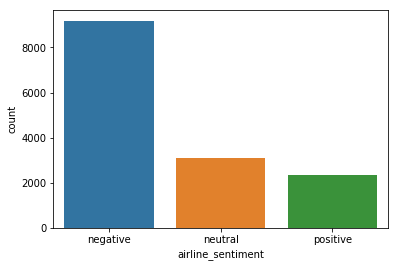

In [7]:
sns.countplot(x='airline_sentiment',data=Tweets,order=['negative','neutral','positive'])
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


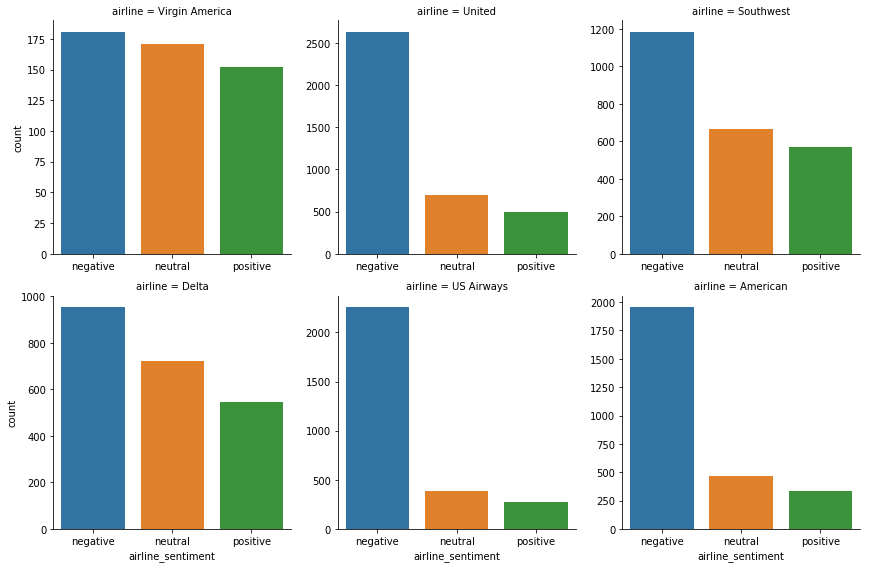

In [8]:
sns.factorplot(x = 'airline_sentiment',data=Tweets,order = ['negative','neutral','positive'],kind = 'count',col_wrap=3,col='airline',size=4,aspect=1,sharex=False,sharey=False)
plt.show()

In [9]:
Tweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

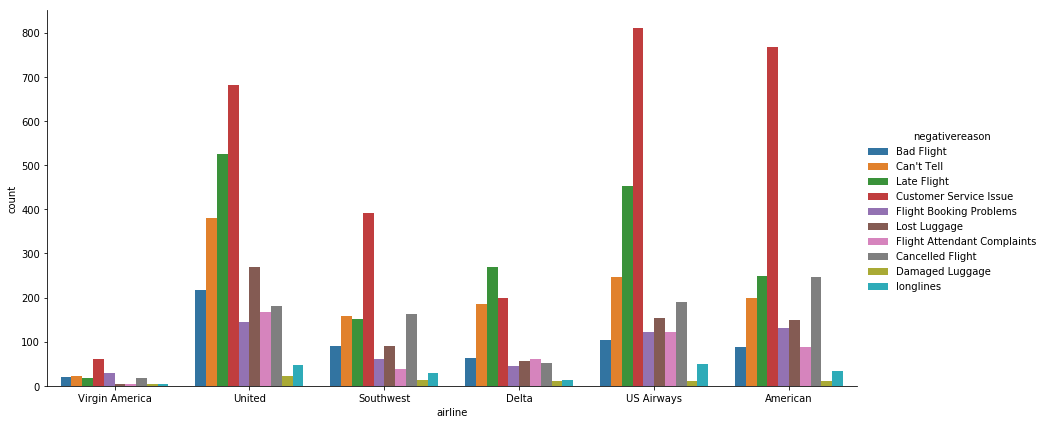

In [10]:
sns.factorplot(x = 'airline',data = Tweets,kind = 'count',hue='negativereason',size=6,aspect=2)
plt.show()

In [11]:
import re
#remove words which are starts with @ symbols
Tweets['text'] = Tweets['text'].map(lambda x:re.sub('@\w*','',str(x)))

In [12]:
#remove special characters except [a-zA-Z]
Tweets['text'] = Tweets['text'].map(lambda x:re.sub('[^a-zA-Z]',' ',str(x)))

In [13]:
#remove link starts with https
Tweets['text'] = Tweets['text'].map(lambda x:re.sub('http.*','',str(x)))

In [14]:
Tweets['text'] = Tweets['text'].map(lambda x:str(x).lower())

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
Tweets['text'] = Tweets['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [17]:
Tweets['text'].head(10)

0                                                 said
1              plus added commercials experience tacky
2               today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
5    seriously would pay flight seats playing reall...
6        yes nearly every time fly vx ear worm go away
7    really missed prime opportunity men without ha...
8                                                 well
9                      amazing arrived hour early good
Name: text, dtype: object

In [18]:
from nltk.stem.wordnet import WordNetLemmatizer

In [19]:
lem = WordNetLemmatizer()
Tweets['text'] = Tweets['text'].apply(lambda x: " ".join(lem.lemmatize(x,pos='a') for x in x.split()))
Tweets['text'] = Tweets['text'].apply(lambda x: " ".join(lem.lemmatize(x,pos='r') for x in x.split()))
Tweets['text'] = Tweets['text'].apply(lambda x: " ".join(lem.lemmatize(x,pos='n') for x in x.split()))
Tweets['text'] = Tweets['text'].apply(lambda x: " ".join(lem.lemmatize(x,pos='v') for x in x.split()))

In [20]:
Tweets['text']

0                                                      say
1                     plus add commercial experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank get different flight chicago
14636    leave minute late flight warn communication mi...
14637             please bring american airline blackberry
14638    money change flight answer phone suggestion ma...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [21]:
#stemming made the words lose their sense

In [22]:
X = Tweets[['text']]

In [23]:
X

,text
0,say
1,plus add commercial experience tacky
2,today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing
...,...
14635,thank get different flight chicago
14636,leave minute late flight warn communication mi...
14637,please bring american airline blackberry
14638,money change flight answer phone suggestion ma...


In [24]:
y = Tweets['airline_sentiment'].map({'neutral':1,'negative':0,'positive':2})

In [25]:
y

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11712, 1) (2928, 1) (11712,) (2928,)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TFIDF

vector = TfidfVectorizer(stop_words='english',sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{2,}',ngram_range=(1,1),max_features=30000)
#token_patten #2 for word length greater than 2>=
X_train_word_feature = vector.fit_transform(X_train['text']).toarray()
X_test_word_feature = vector.transform(X_test['text']).toarray()
print(X_train_word_feature.shape,X_test_word_feature.shape)

(11712, 7670) (2928, 7670)


In [28]:
#training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
classifier = LogisticRegression()
classifier.fit(X_train_word_feature,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = classifier.predict(X_test_word_feature)
cm = confusion_matrix(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred),'\n',cm,'\n',acc_score)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1870
           1       0.69      0.40      0.50       614
           2       0.80      0.57      0.66       444

    accuracy                           0.78      2928
   macro avg       0.76      0.64      0.68      2928
weighted avg       0.77      0.78      0.76      2928
 
 [[1775   69   26]
 [ 332  244   38]
 [ 152   41  251]] 
 0.7752732240437158
